Total Sales: 2252607.4127
Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64
Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24 Color                       18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Let

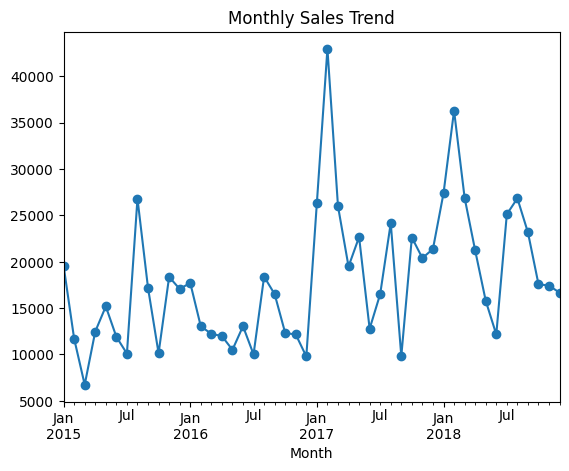

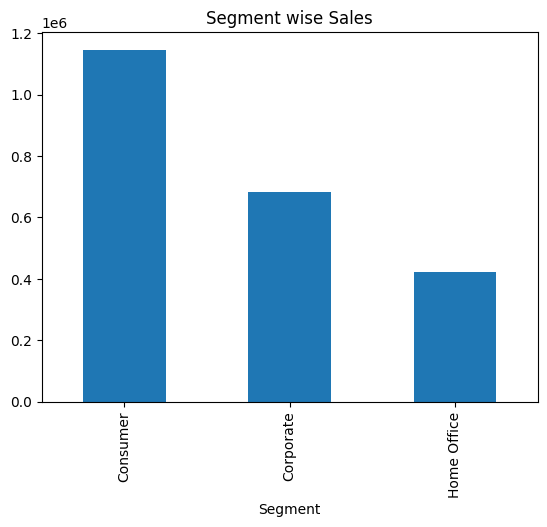

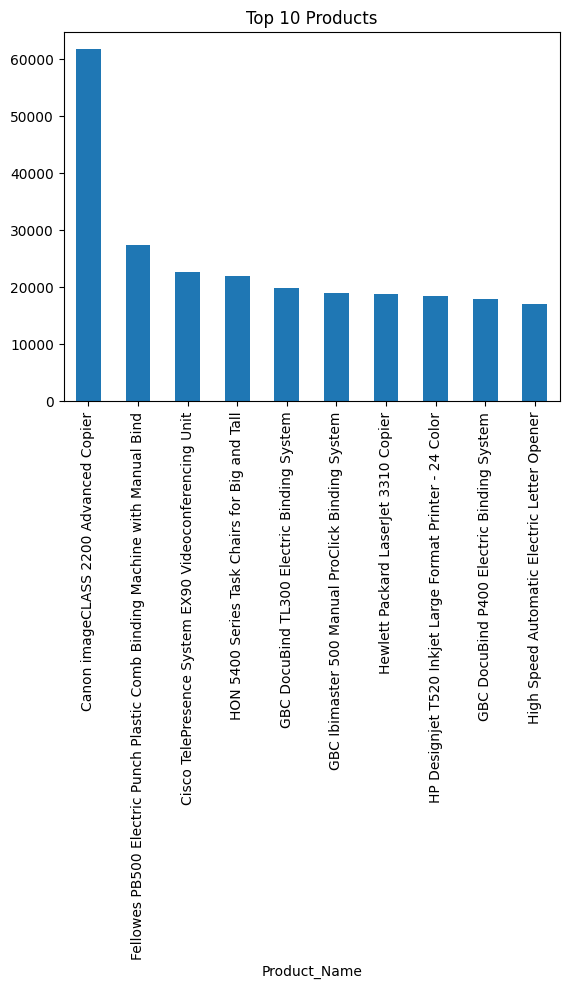

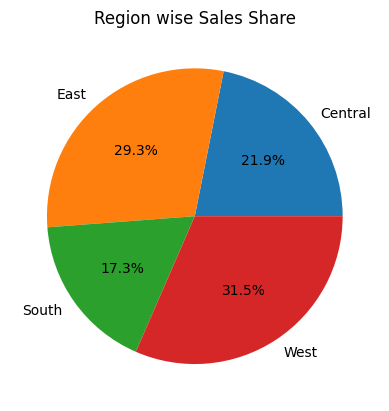

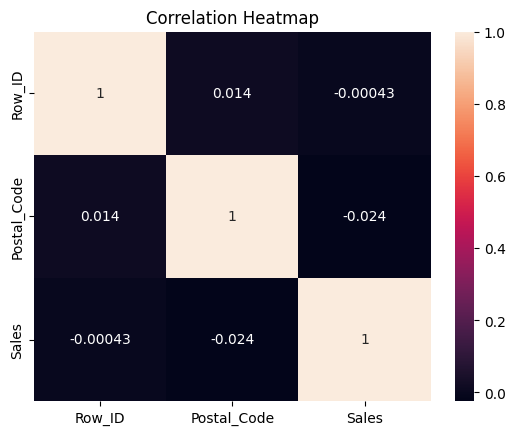

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('/content/superstore_final_dataset (1).csv', encoding='latin1')

# Basic checks
df = df.drop_duplicates()
df = df.dropna(subset=['Postal_Code'])  # ya fill kar do, jo chaho

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')
df.columns = df.columns.str.strip().str.replace(' ', '_')

# EDA
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

# Grouped info
print(df.groupby('Region')['Sales'].sum().sort_values(ascending=False))
print(df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10))

# Monthly sales line plot
df['Month'] = df['Order_Date'].dt.to_period('M')
df.groupby('Month')['Sales'].sum().plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.show()

# Segment bar chart
df.groupby('Segment')['Sales'].sum().plot(kind='bar')
plt.title('Segment wise Sales')
plt.show()

# Top products bar chart
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.show()

# Region pie chart
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Region wise Sales Share')
plt.ylabel('')
plt.show()

# Correlation heatmap - only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
if len(numeric_cols.columns) > 1:
    corr = numeric_cols.corr()
    sns.heatmap(corr, annot=True)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")
